In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
current_path = os.getcwd()
if not os.path.exists(os.path.join(current_path, 'method1')):
    os.mkdir(os.path.join(current_path, 'method1'))
os.chdir(os.path.join(current_path, 'method1'))

In [4]:
fontdict={'fontsize': 12, 'weight': 'bold'}

# 애플(AAPL) 주식 데이터 다운로드
apple = yf.download('AAPL', start='2022-07-13', end='2024-01-01', progress=False)

# 삼성(SSNLF) 주식 데이터 다운로드
samsung = yf.download('005930.KS', start='2022-07-13', end='2024-01-01', progress=False)


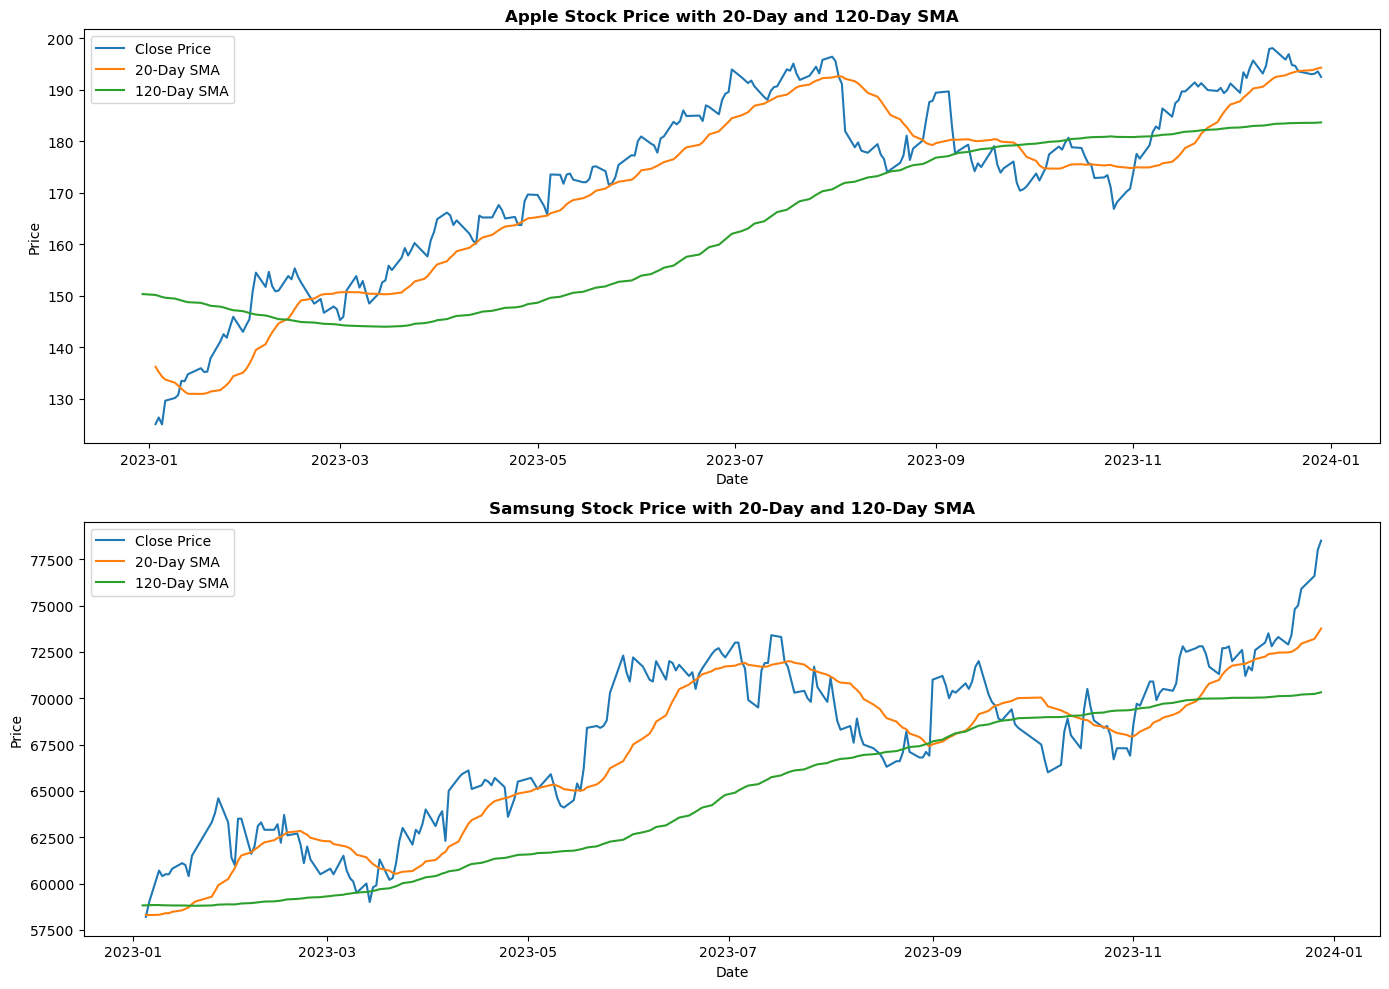

In [6]:
def simple_moving_average(data, window):
    sma = data.rolling(window=window).mean()
    return sma


def plot_close(data, ax, name):
    ax.plot(data.iloc[120:]['Close'], label='Close Price')
    ax.plot(data.iloc[120:]['SMA_20'], label='20-Day SMA')
    ax.plot(data['SMA_120'], label='120-Day SMA')
    ax.legend()
    ax.set_title(f'{name[0].upper()+name[1:]} Stock Price with 20-Day and 120-Day SMA', fontdict=fontdict)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

# 단순 이동 평균 계산
apple['SMA_20'] = simple_moving_average(apple['Close'], 20)
apple['SMA_120'] = simple_moving_average(apple['Close'], 120)
samsung['SMA_20'] = simple_moving_average(samsung['Close'], 20)
samsung['SMA_120'] = simple_moving_average(samsung['Close'], 120)

# 그래프 시각화
fig, axs = plt.subplots(2, 1, figsize=(14, 10))
plot_close(apple, axs[0], 'apple')
plot_close(samsung, axs[1], 'samsung')

plt.tight_layout()
# plt.show()
plt.savefig('stock_price_with_sma.png')

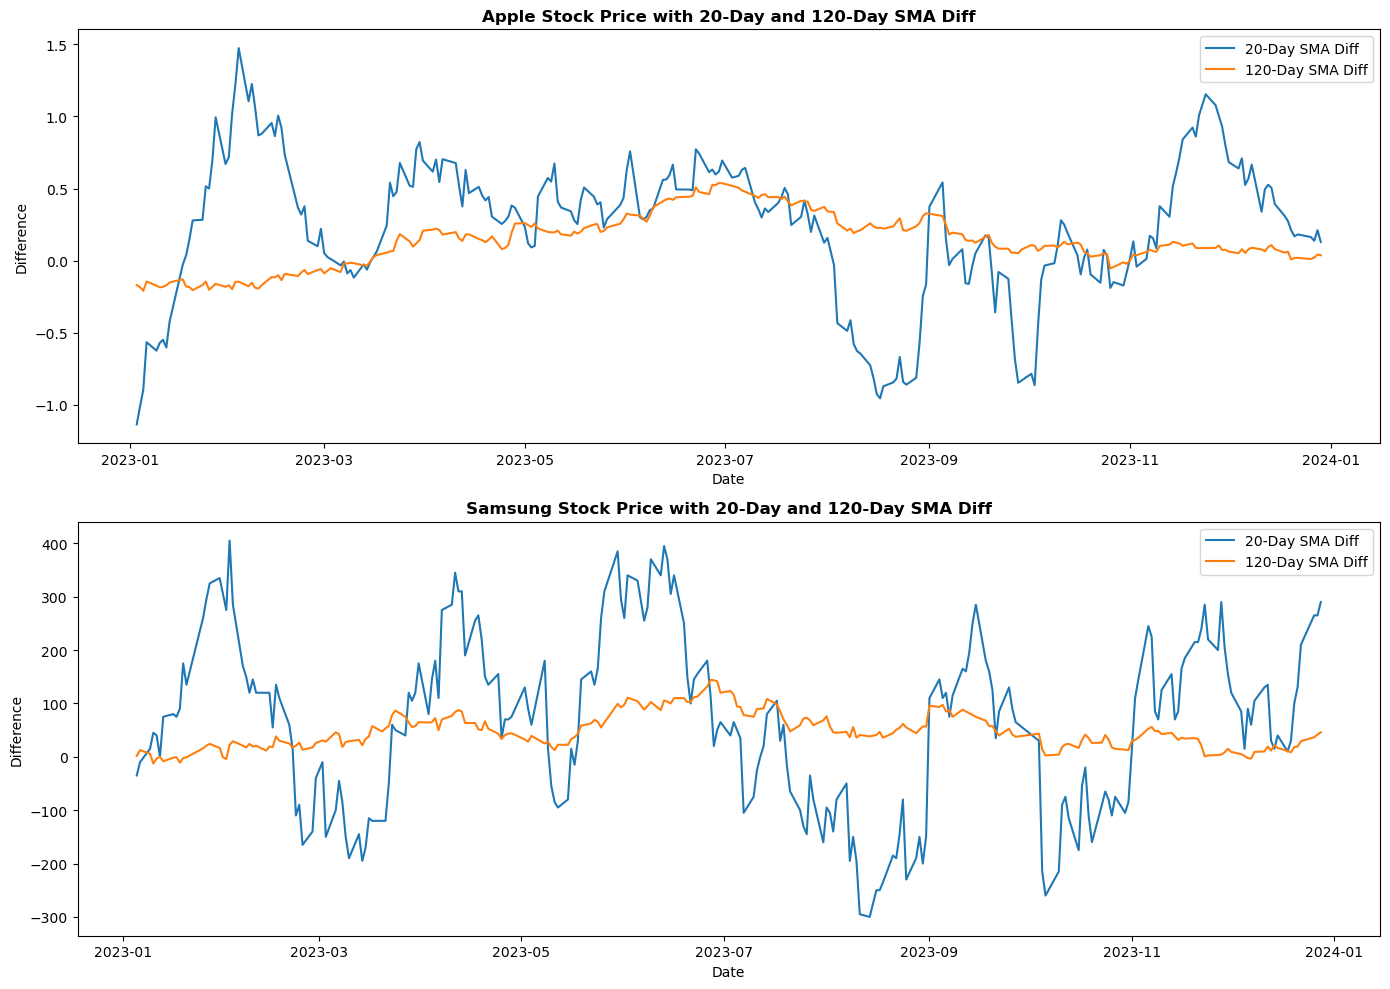

In [8]:
def plot_diff(data, ax, name):
    ax.plot(data.iloc[120:]['SMA_20_diff'], label='20-Day SMA Diff')
    ax.plot(data.iloc[120:]['SMA_120_diff'], label='120-Day SMA Diff')
    ax.legend()
    ax.set_title(f'{name[0].upper()+name[1:]} Stock Price with 20-Day and 120-Day SMA Diff', fontdict=fontdict)
    ax.set_xlabel('Date')
    ax.set_ylabel('Difference')
    # ax.grid()


apple['SMA_20_diff'] = apple['SMA_20'].diff()
apple['SMA_120_diff'] = apple['SMA_120'].diff()
samsung['SMA_20_diff'] = samsung['SMA_20'].diff()
samsung['SMA_120_diff'] = samsung['SMA_120'].diff()

fig, axs = plt.subplots(2, 1, figsize=(14, 10))
plot_diff(apple, axs[0], 'apple')
plot_diff(samsung, axs[1], 'samsung')

plt.tight_layout()
# plt.show()
plt.savefig('stock_price_with_sma_diff.png')

/tmp/ipykernel_55519/1692788292.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.bar(data.iloc[120:][inc_sma_20].index, data.iloc[120:][inc_sma_20]['SMA_20_diff'], color='g', label='20-Day SMA Up')
/tmp/ipykernel_55519/1692788292.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.bar(data.iloc[120:][inc_sma_20].index, data.iloc[120:][inc_sma_20]['SMA_20_diff'], color='g', label='20-Day SMA Up')
/tmp/ipykernel_55519/1692788292.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.bar(data.iloc[120:][dec_sma_20].index, data.iloc[120:][dec_sma_20]['SMA_20_diff'], color='r', label='20-Day SMA Down')
/tmp/ipykernel_55519/1692788292.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.bar(data.iloc[120:][dec_sma_20].index, data.iloc[120:][dec_sma_20]['SMA_20_diff'], color='r', label='20-Day SMA Down')
/tmp/ipykernel_55519/1692788292.py:31: UserWarni

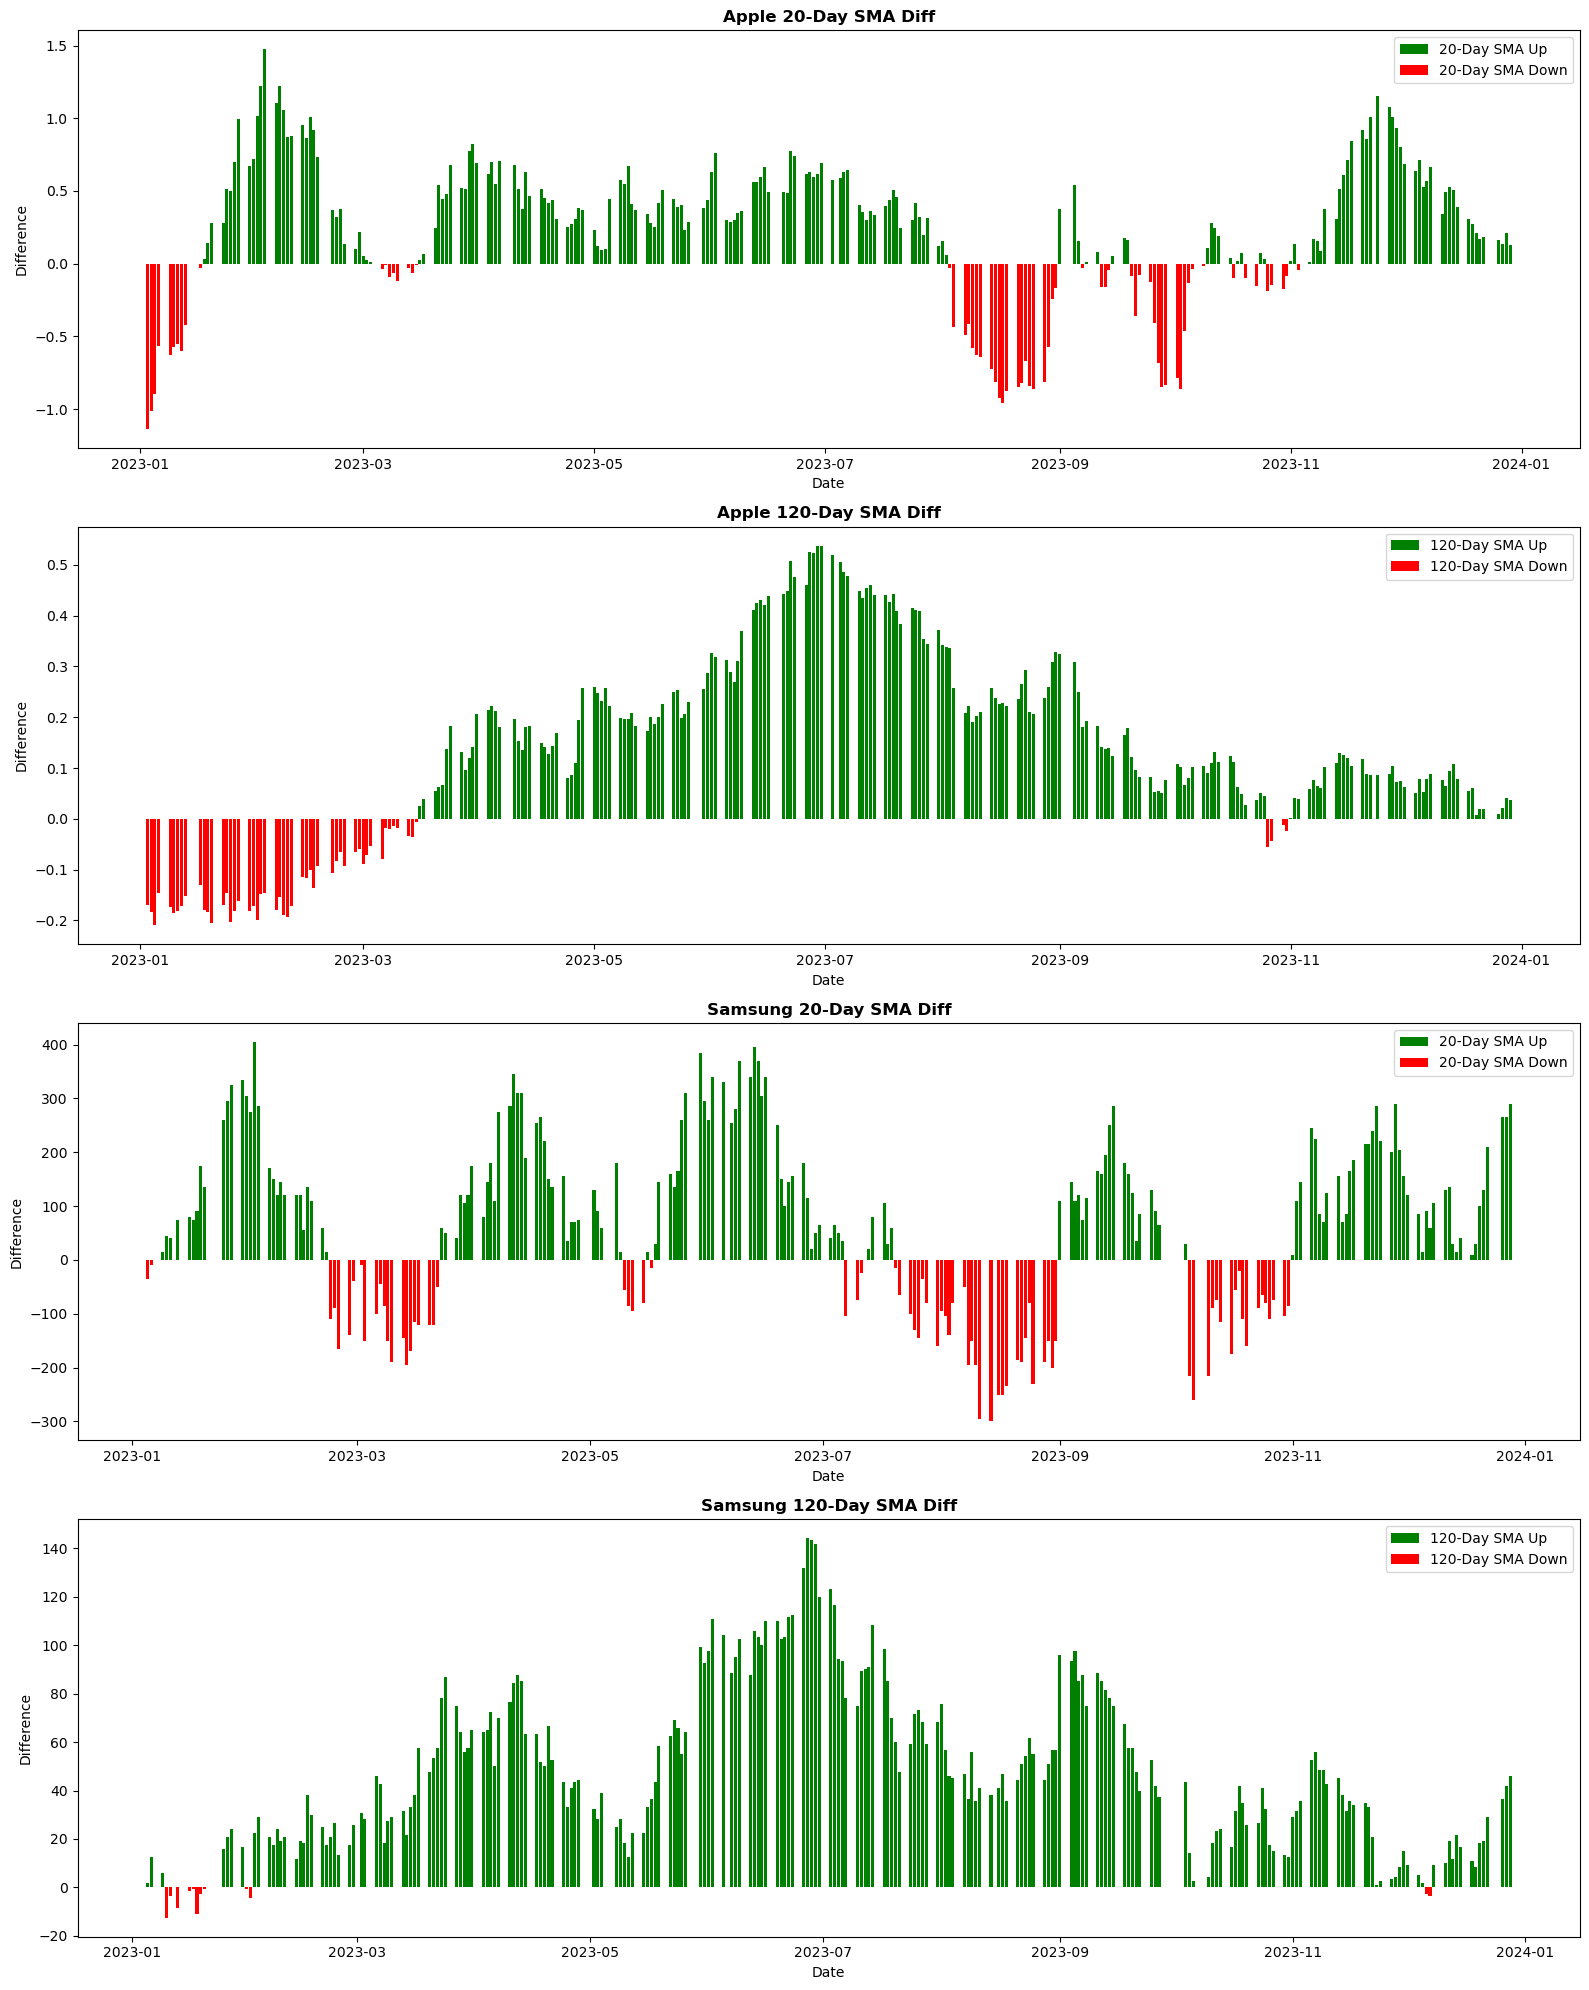

In [9]:
def plot_sign_sma_20(data, ax, name):
    inc_sma_20 = data['SMA_20_diff'] > 0
    dec_sma_20 = data['SMA_20_diff'] < 0
    tmp_b = []
    for i in range(len(data.iloc[120:]['SMA_20_diff'].index)-1):
        if data.iloc[120+i]['SMA_20_diff'] > 0 and data.iloc[120+i+1]['SMA_20_diff'] < 0 or data.iloc[120+i]['SMA_20_diff'] < 0 and data.iloc[120+i+1]['SMA_20_diff'] > 0:
            tmp_b.append(data.iloc[120:]['SMA_20_diff'].index[i])
            tmp_b.append(data.iloc[120:]['SMA_20_diff'].index[i+1])
    tmp_b = sorted(list(set(tmp_b)))
    global boundary
    boundary.append(tmp_b)
    ax.bar(data.iloc[120:][inc_sma_20].index, data.iloc[120:][inc_sma_20]['SMA_20_diff'], color='g', label='20-Day SMA Up')
    ax.bar(data.iloc[120:][dec_sma_20].index, data.iloc[120:][dec_sma_20]['SMA_20_diff'], color='r', label='20-Day SMA Down')
    ax.legend(loc='upper right')
    ax.set_title(f'{name[0].upper()+name[1:]} 20-Day SMA Diff', fontdict=fontdict)
    ax.set_xlabel('Date')
    ax.set_ylabel('Difference')


def plot_sign_sma_120(data, ax, name):
    inc_sma_120 = data['SMA_120_diff'] > 0
    dec_sma_120 = data['SMA_120_diff'] < 0
    tmp_b = []
    for i in range(len(data.iloc[120:]['SMA_120_diff'].index)-1):
        if data.iloc[120+i]['SMA_120_diff'] > 0 and data.iloc[120+i+1]['SMA_120_diff'] < 0 or data.iloc[120+i]['SMA_120_diff'] < 0 and data.iloc[120+i+1]['SMA_120_diff'] > 0:
            tmp_b.append(data.iloc[120:]['SMA_120_diff'].index[i])
            tmp_b.append(data.iloc[120:]['SMA_120_diff'].index[i+1])
    tmp_b = sorted(list(set(tmp_b)))
    global boundary
    boundary.append(tmp_b)
    ax.bar(data.iloc[120:][inc_sma_120].index, data.iloc[120:][inc_sma_120]['SMA_120_diff'], color='g', label='120-Day SMA Up')
    ax.bar(data.iloc[120:][dec_sma_120].index, data.iloc[120:][dec_sma_120]['SMA_120_diff'], color='r', label='120-Day SMA Down')
    ax.legend(loc='upper right')
    ax.set_title(f'{name[0].upper()+name[1:]} 120-Day SMA Diff', fontdict=fontdict)
    ax.set_xlabel('Date')
    ax.set_ylabel('Difference')


fig, axs = plt.subplots(4, 1, figsize=(16, 20))

boundary = []
plot_sign_sma_20(apple, axs[0], 'apple')
plot_sign_sma_120(apple, axs[1], 'apple')
plot_sign_sma_20(samsung, axs[2], 'samsung')
plot_sign_sma_120(samsung, axs[3], 'samsung')

plt.tight_layout()
# plt.show()
plt.savefig('stock_price_with_sma_sign.png')

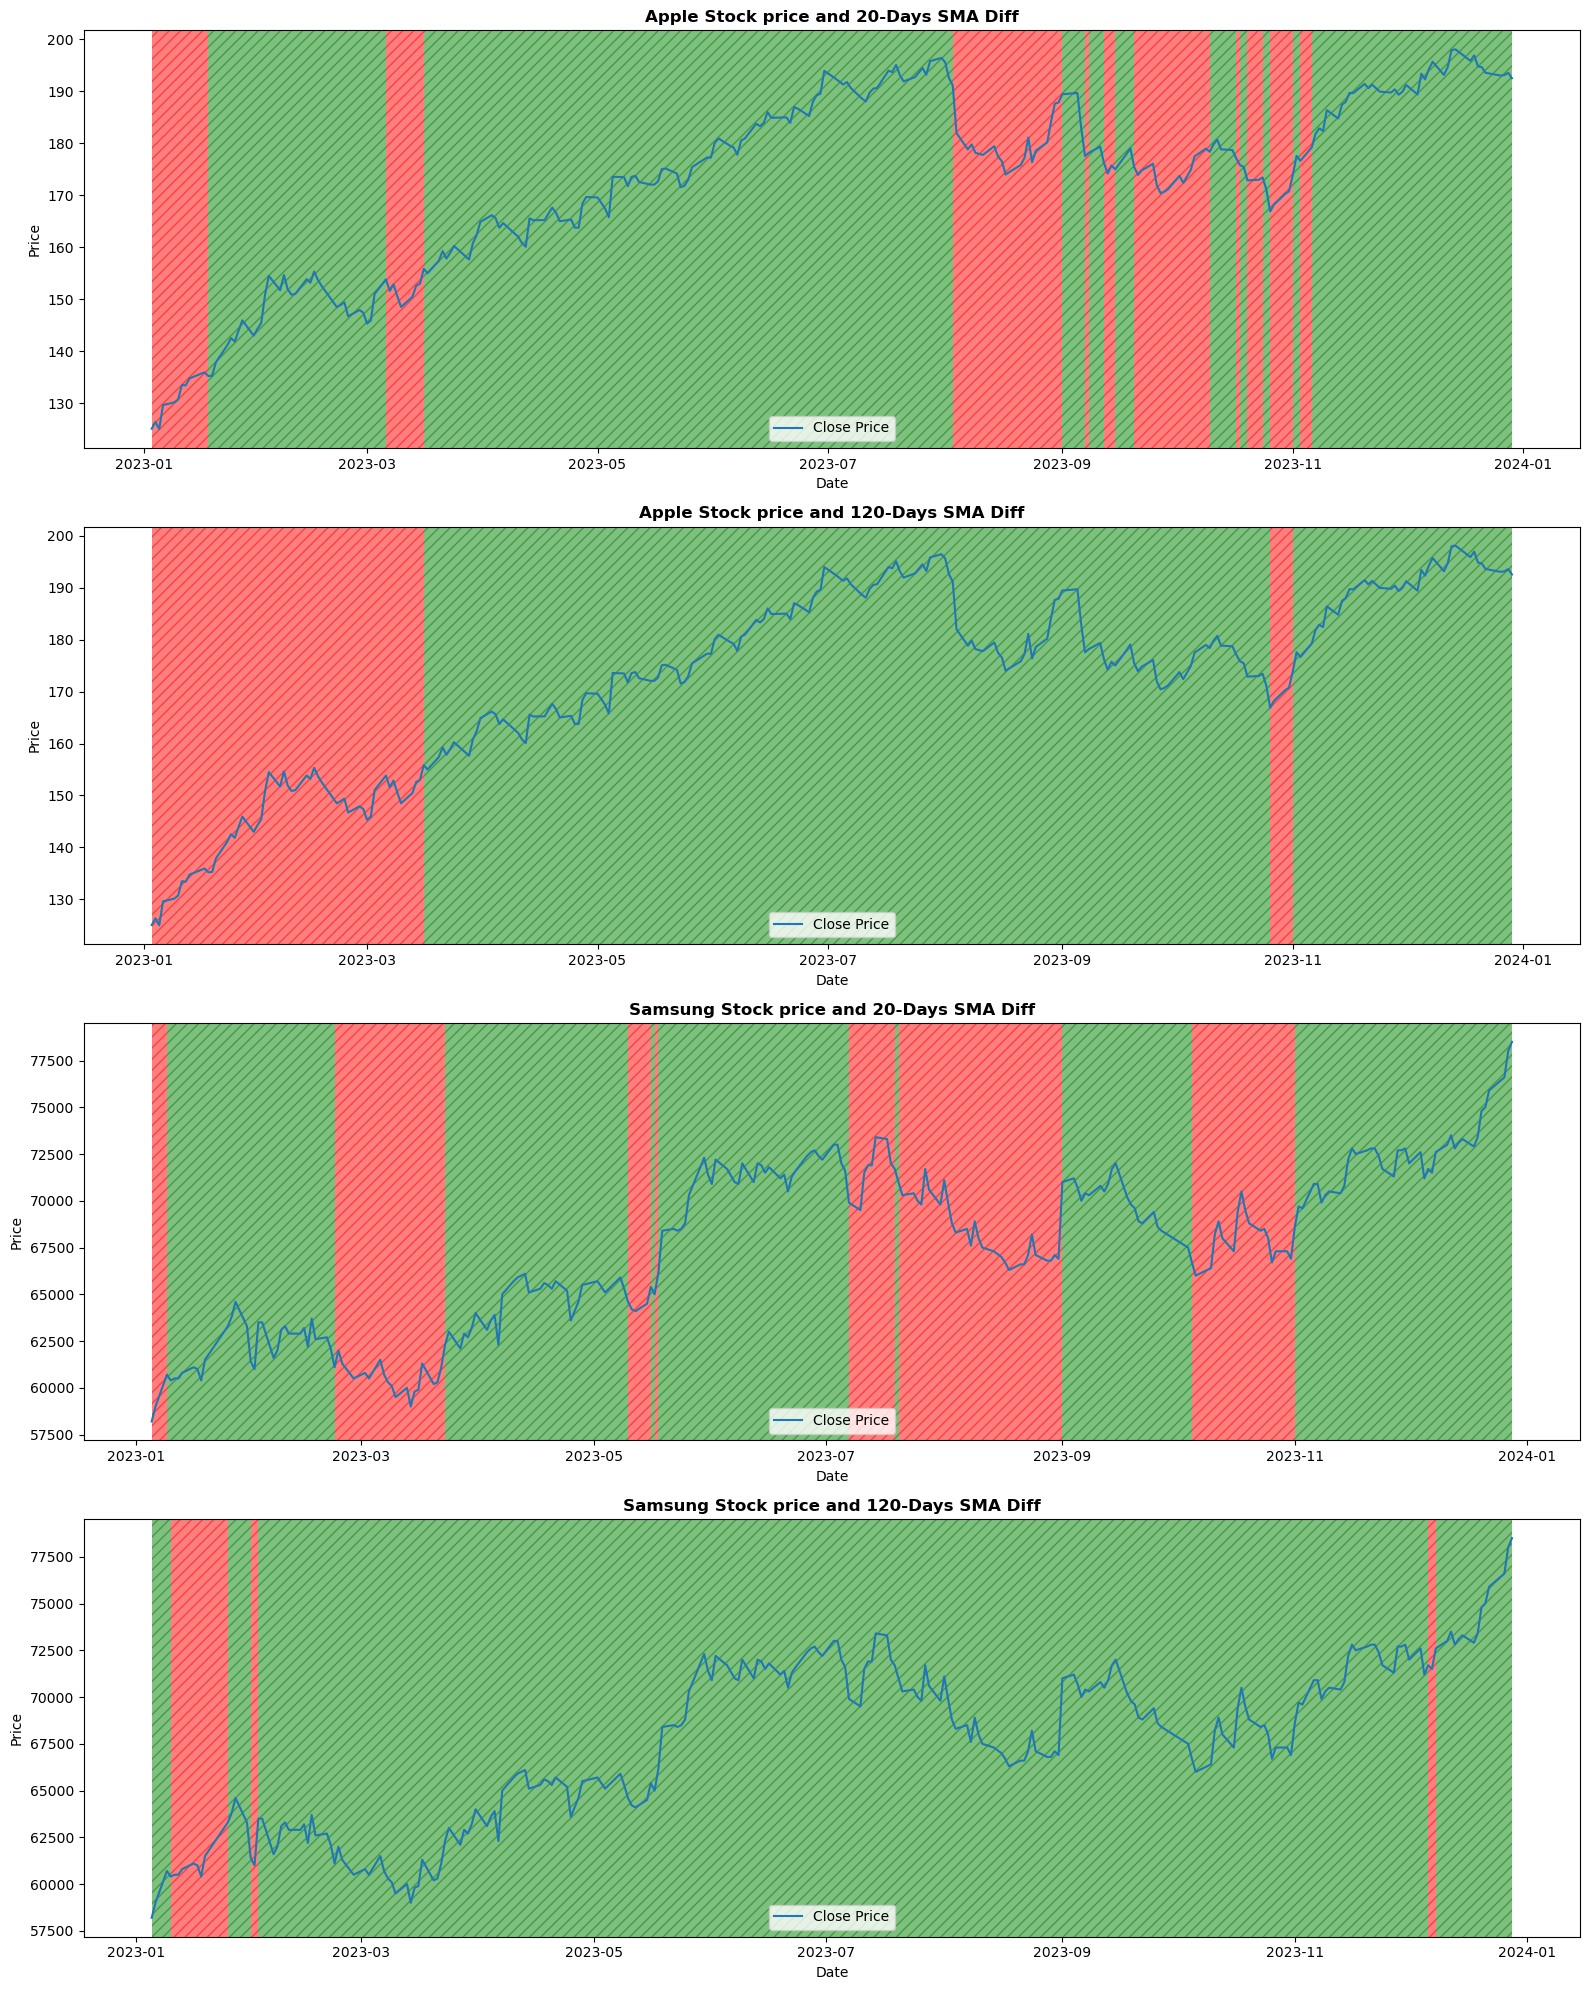

In [10]:
def plot_boundary(data, ax, name, boundary, SMA):
    if data.loc[boundary[0], SMA] > 0:
        ax.axvspan(data.index[120], boundary[0], color='g', alpha=0.5, hatch='///', linewidth=0)
    else:
        ax.axvspan(data.index[120], boundary[0], color='r', alpha=0.5, hatch='///', linewidth=0)
    for i in range(len(boundary)-1):
        if data.loc[boundary[i], SMA] > 0:
            ax.axvspan(boundary[i], boundary[i+1], color='g', alpha=0.5, hatch='///', linewidth=0)
        else:
            ax.axvspan(boundary[i], boundary[i+1], color='r', alpha=0.5, hatch='///', linewidth=0)
    if data.loc[boundary[-1], SMA] > 0:
        ax.axvspan(boundary[-1], data.index[-1], color='g', alpha=0.5, hatch='///', linewidth=0)
    else:
        ax.axvspan(boundary[-1], data.index[-1], color='r', alpha=0.5, hatch='///', linewidth=0)
    ax.plot(data.iloc[120:]['Close'], label='Close Price')
    ax.legend(loc='lower center')
    if SMA == 'SMA_20_diff':
        ax.set_title(f'{name[0].upper()+name[1:]} Stock price and 20-Days SMA Diff', fontdict=fontdict)
    else:
        ax.set_title(f'{name[0].upper()+name[1:]} Stock price and 120-Days SMA Diff', fontdict=fontdict)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

fig, axs = plt.subplots(4, 1, figsize=(16, 20))
plot_boundary(apple, axs[0], 'apple', boundary[0], 'SMA_20_diff')
plot_boundary(apple, axs[1], 'apple', boundary[1], 'SMA_120_diff')
plot_boundary(samsung, axs[2], 'samsung', boundary[2], 'SMA_20_diff')
plot_boundary(samsung, axs[3], 'samsung', boundary[3], 'SMA_120_diff')

plt.tight_layout()
# plt.show()
plt.savefig('stock_price_with_sma_sign_boundary.png')